# Parameter Sampler Tutorial
Create sets of parameters and compartment proportions

## Setup

In [ ]:
import numpy as np

from flumodelingsuite.sampler import generate_parameter_samples
from datetime import date

from matplotlib import pyplot as plt

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = False 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

## Parameter settings

In [17]:
# Compartments
names = ["L", "I_symp", "I_asymp"]
mins = [0.2, 0.1, 0.05]
maxs = [0.25, 0.2, 0.1]
sum(maxs)

0.55

In [18]:
# Parameters (examples)
param_specs = [
    {"name": "Rt", "type": "uniform", "args": (1.2, 2.0)},
    {"name": "vaccine_effectiveness", "type": "uniform", "args": (0.1, 0.5)},
    {"name": "start_date", "type": "date_uniform", "reference_date": date(2024, 10, 1), "args": (0, 30)},
    {"name": "my_int", "type": "randint", "args": (1, 12)},
]


In [19]:
n_samples = 10000 # 2**15
n_samples

10000

## Generate parameters

In [20]:
# Build
samples = generate_parameter_samples(
    n_samples=n_samples,
    compartment_names=names,
    mins=mins,
    maxs=maxs,
    param_specs=param_specs,
    seed=2025,  # determinism
    scramble=False,
    sampling_method="lhs",
)

In [21]:
samples

SamplingResult(n=10000, compartments=3, parameters=4)

In [22]:
comps = samples.compartments
params = samples.parameters

## Check parameters

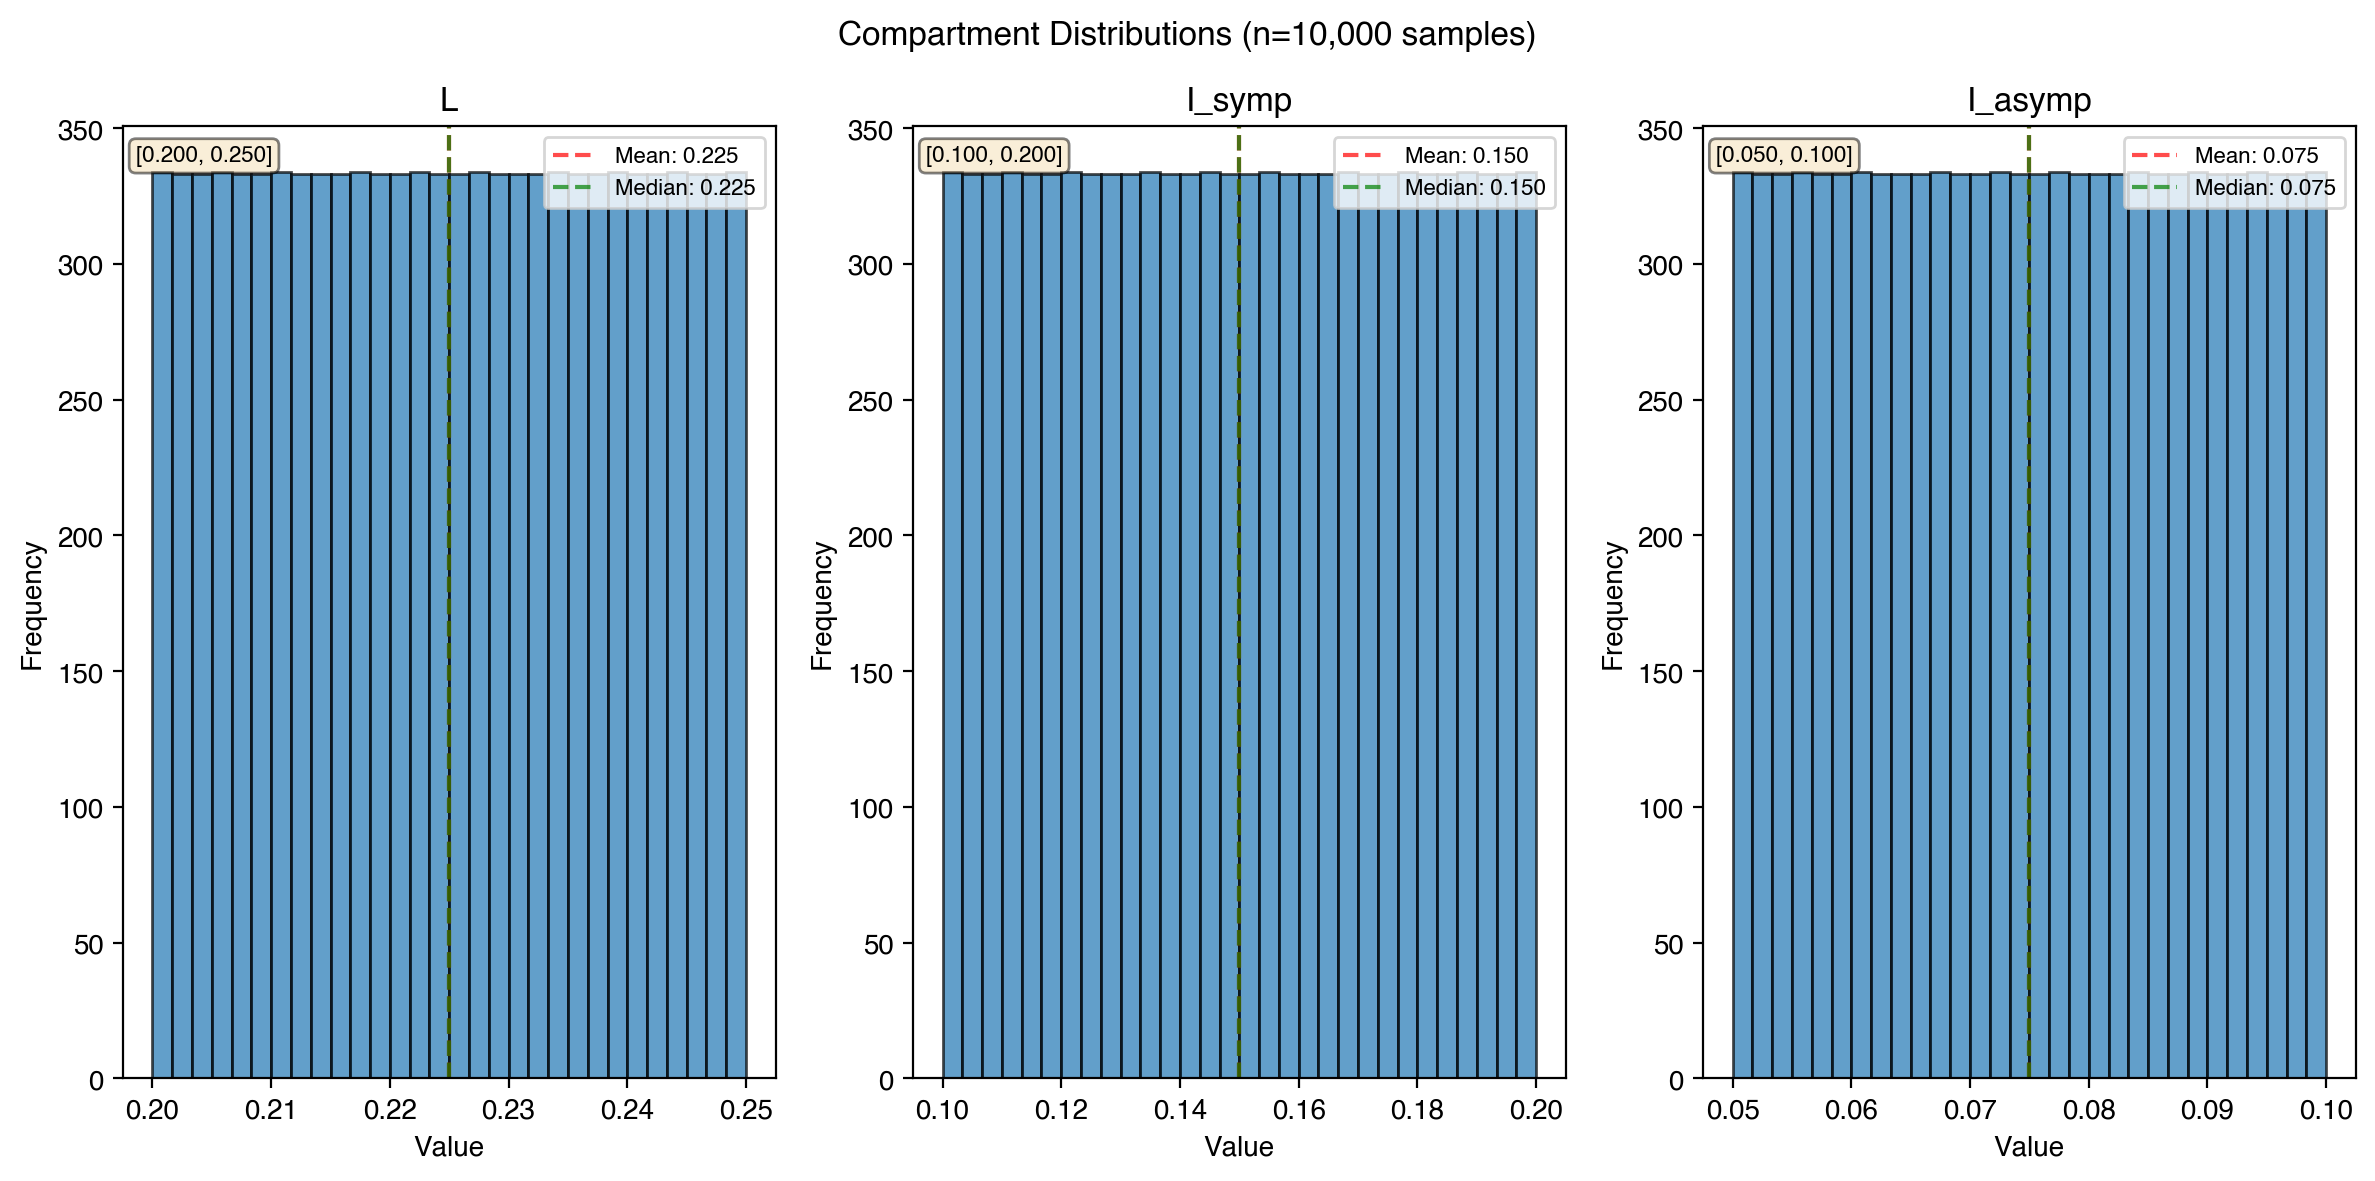

In [23]:
samples.plot_compartments_distribution()
plt.show()

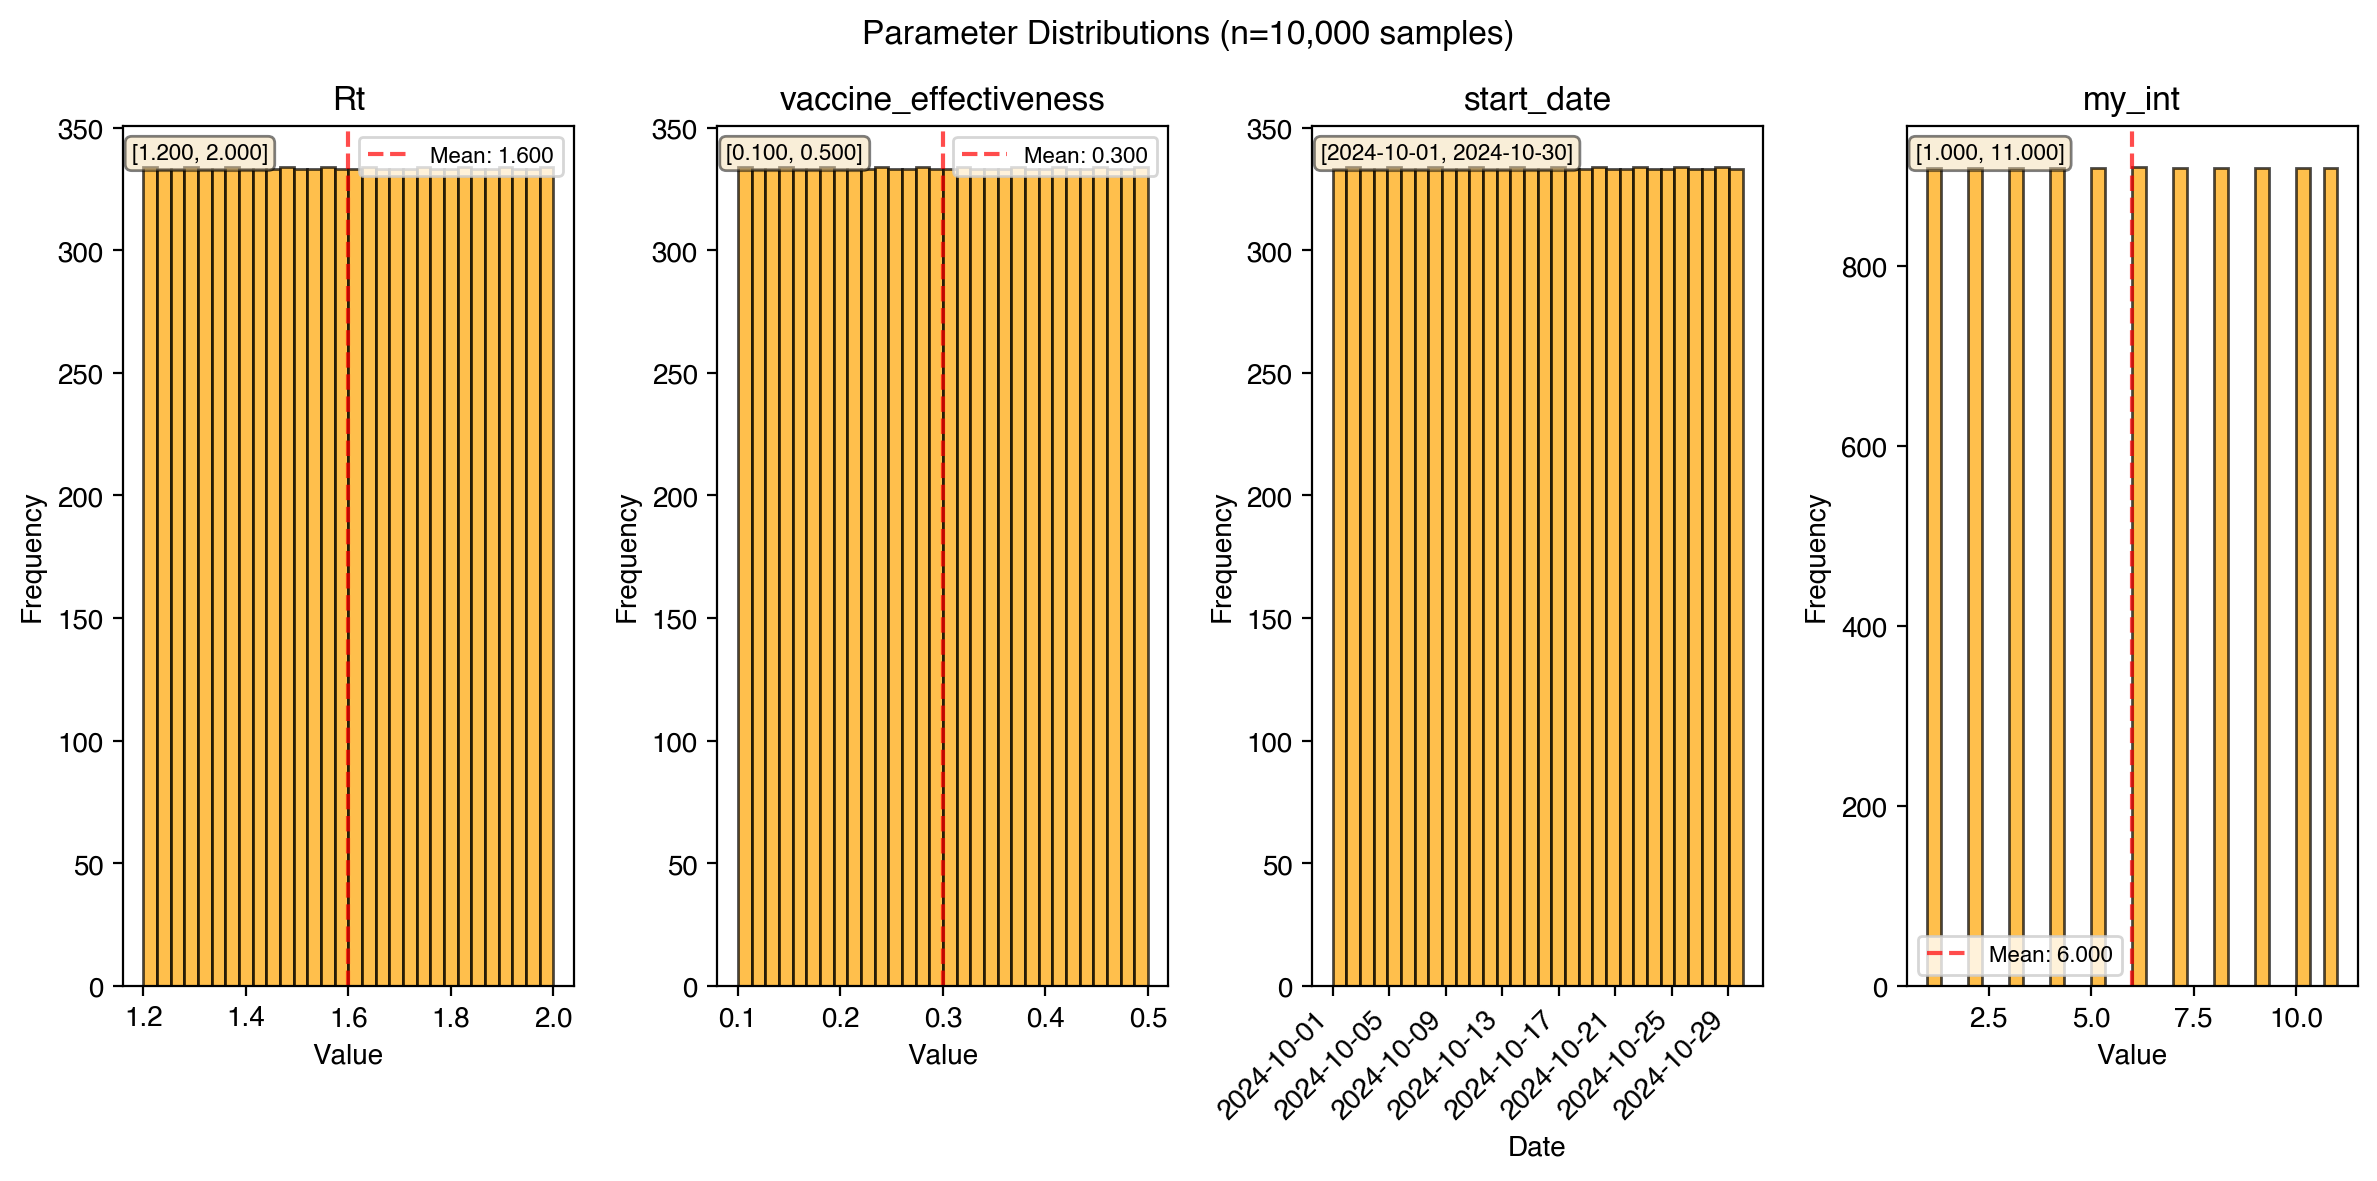

In [24]:
samples.plot_parameters_distribution()
plt.show()

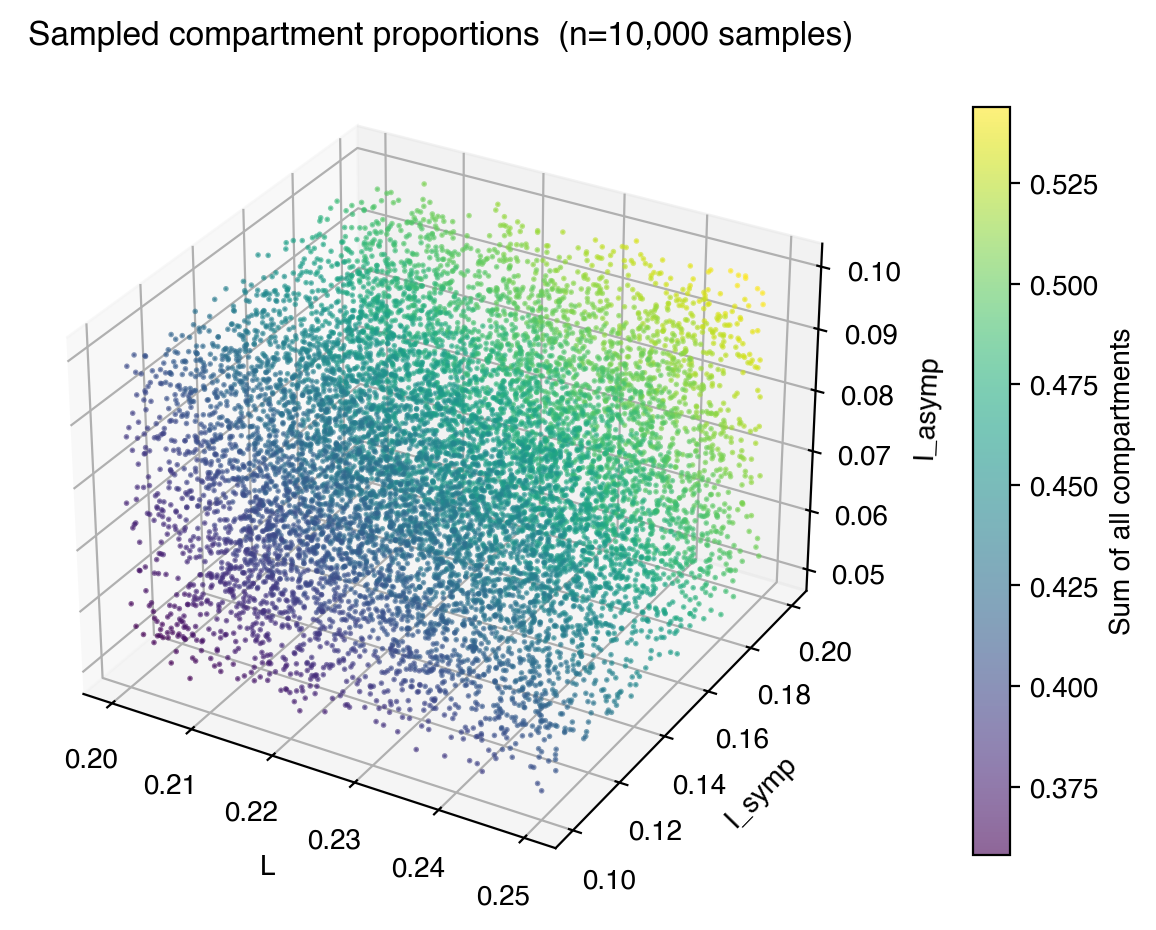

In [25]:
samples.plot_compartments_3d(['L', 'I_symp', 'I_asymp'])
plt.show()

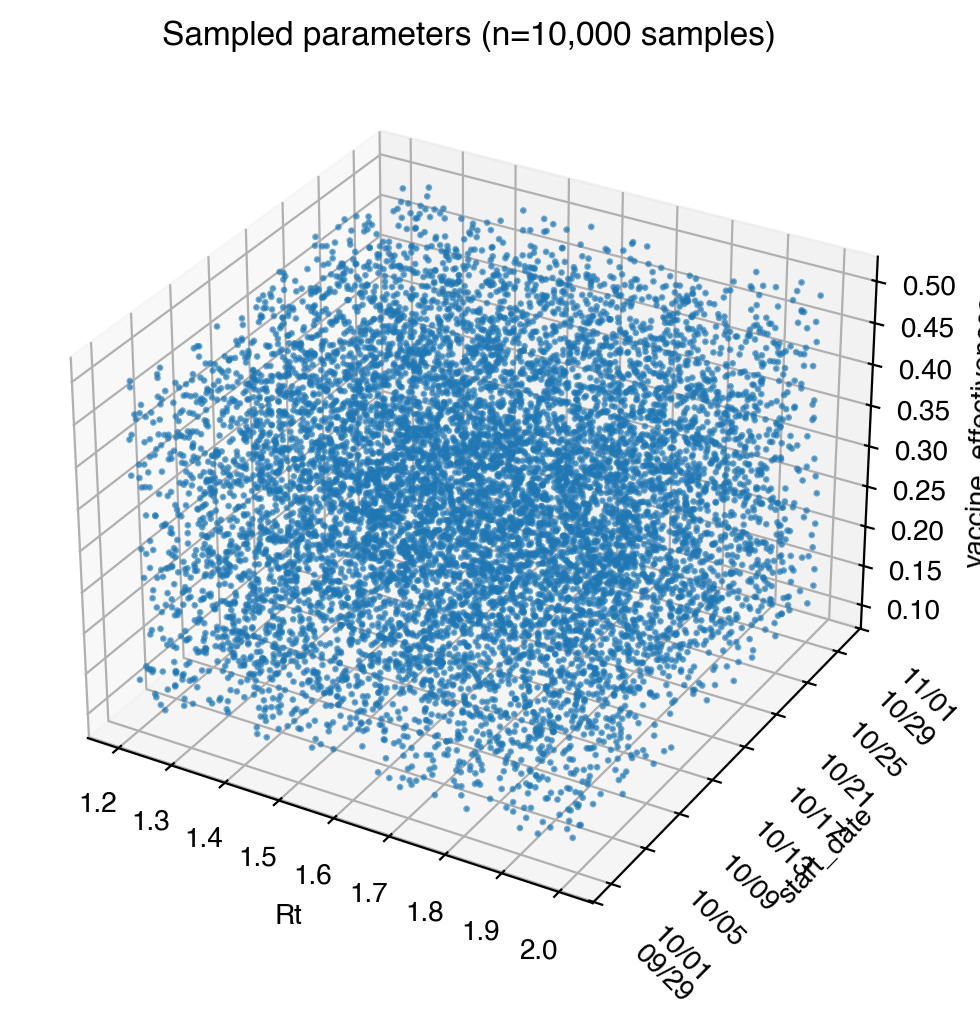

In [26]:
samples.plot_parameters_3d(['Rt', 'start_date', 'vaccine_effectiveness'])
plt.show()

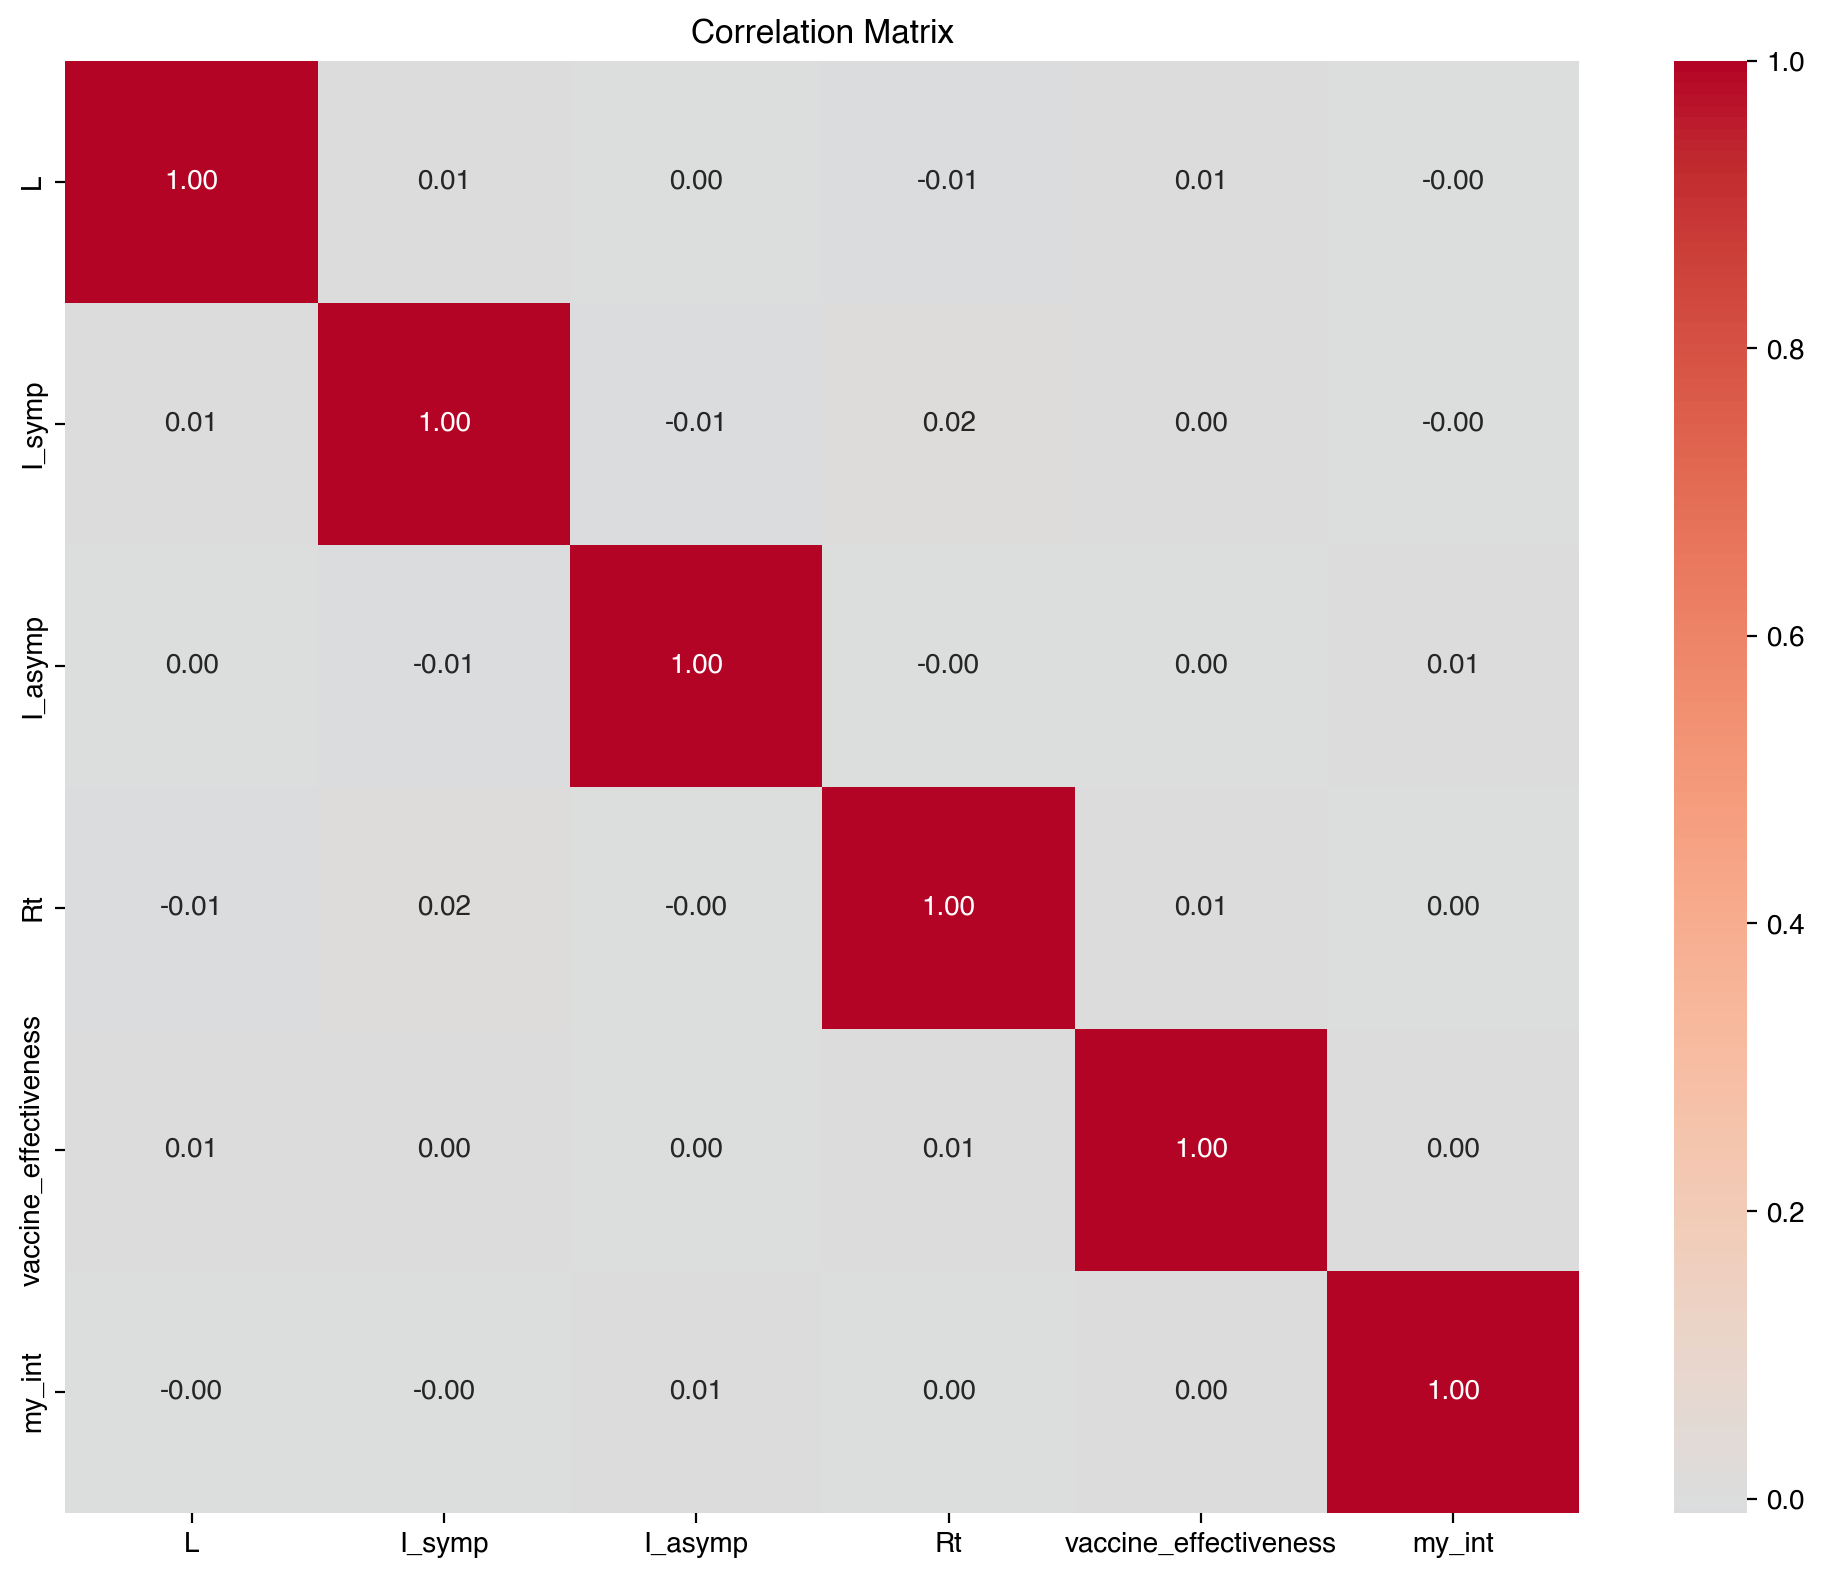

In [28]:
samples.plot_correlation_matrix()
plt.show()

In [ ]:
np.all((comps["L"] + comps["I_symp"] + comps["I_asymp"]) <= 1.0 + 1e-6)

np.True_